In [137]:
# Importing standard Qiskit libraries
# Am adaugat aici si bibliotecile de care e nevoie sa ruleze toate functiile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, Aer,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,pauli_error, depolarizing_error, thermal_relaxation_error)
from qiskit.quantum_info import DensityMatrix, partial_trace
import numpy as np
import random
from scipy.linalg import eig
import math 
from numpy import pi
from itertools import combinations
import time
import itertools
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [ ]:
'''
Bell
'''

In [138]:
#Stari Bell 

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

def bell_state_1(): 
    circuit.h(qreg_q[0])
    circuit.cx(qreg_q[0], qreg_q[1])
    
def bell_state_2():
    circuit.x(qreg_q[0])
    circuit.h(qreg_q[0])
    circuit.cx(qreg_q[0], qreg_q[1])
    
def bell_state_3():
    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    
def bell_state_4():
    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.z(qreg_q[0])
    circuit.z(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    
selected_bell_state=bell_state_1

selected_bell_state()

CircuitComposer(circuit=circuit)

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fc0bf433e20>)

In [139]:
#Calcul inegalitate Bell, CHSH pentru variabile ascunse
coincidences = 0 
nrRuns=1024
for i in range(nrRuns):

    hiddenA = random.choice([0, 1])
    hiddenB = random.choice([0, 1])
    hiddenC = random.choice([0, 1])

    entangledParticle1 = [hiddenA, hiddenB, hiddenC]
    entangledParticle2 = [1-hiddenA, 1-hiddenB, 1-hiddenC]
    
    firstDeviceSetting= random.choice([0,1,2])
    secondDeviceSetting= random.choice([0,1,2])
    if firstDeviceSetting!=secondDeviceSetting:
        if entangledParticle1[firstDeviceSetting] == entangledParticle2[secondDeviceSetting]:
            coincidences += 1

print("Hidden variable predicts "+ str(coincidences/nrRuns*100)+"%")

Hidden variable predicts 32.03125%


Quantum simulation predicts: 25.966666666666665%


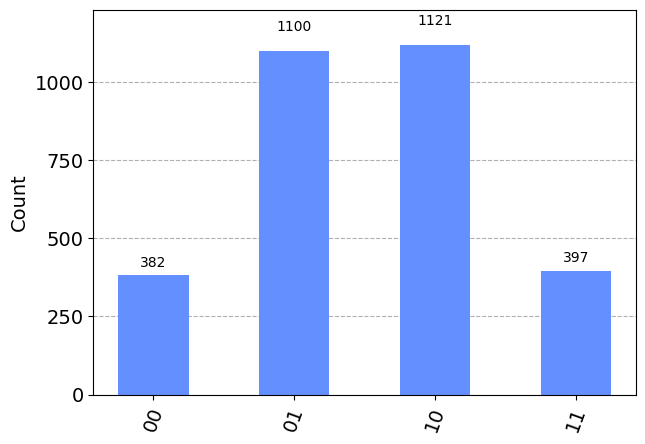

In [140]:
#Calcul inegalitate Bell, CHSH cu simulare cuantica
#creare de functii pentru definirea circuitelor
def circ_filtru1_0():
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.rx(pi / 2, qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[0], creg_c[0])
    
    return circuit


def circ_filtru0_1():
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    
    circuit.rx(pi / 2, qreg_q[1])
    circuit.barrier(qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[0], creg_c[0])
    
    return circuit



def circ_filtru2_0():
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.rx(-pi / 4, qreg_q[0])

    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[0], creg_c[0])

    return circuit

def circ_filtru0_2():
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    
    circuit.rx(-pi / 4, qreg_q[1])
    circuit.barrier(qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[0], creg_c[0])
    
    return circuit


def circ_filtru2_1():
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.rx(-pi / 4, qreg_q[0])
    circuit.rx(pi / 2, qreg_q[1])
    circuit.barrier(qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[0], creg_c[0])
    
    return circuit


def circ_filtru1_2():
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.rx(pi / 2, qreg_q[0])
    circuit.rx(-pi / 4, qreg_q[1])
    circuit.barrier(qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[0], creg_c[0])
    
    return circuit


shots=500
global_counts = {} #un counter global pentru starile pe care le vom #observa pe parcursul simularii celor n circuite
simulator = Aer.get_backend('qasm_simulator')
#Suntem interesati doar de rezultate cand filtrele difera
circuits = [circ_filtru1_0(), circ_filtru2_0(), circ_filtru2_1(),circ_filtru1_2(),circ_filtru0_1(),circ_filtru0_2()]


for circuit in circuits:

    job = execute(circuit, simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(circuit)
    #primul rezultat gasit de un tip trebuie adaugat pe acea pozitie
    for outcome, count in counts.items():
        if outcome in global_counts:
            global_counts[outcome] += count
        else:
            global_counts[outcome] = count 

prob_same = (global_counts['00'] + global_counts['11']) / (shots * len(circuits))
prob_different = (global_counts['01'] + global_counts['10']) / (shots * len(circuits))
print("Quantum simulation predicts: "+ str(prob_same*100)+"%")

plot_histogram(global_counts)   

In [486]:
'''
Metode de verificare Entanglement
'''

'\nMetode de verificare Entanglement\n'

In [141]:
#definirea matricii de densitate prin circuit

qreg_q = QuantumRegister(2, 'q') #2 pt 2 qubiti, 4 pentru 4
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


#circuit.h(qreg_q[0])
#circuit.h(qreg_q[1])

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
#circuit.cx(qreg_q[0], qreg_q[2])

#pentru 2 perechi de qubiti care nu sunt in entanglement una cu cealalta
#circuit.h(qreg_q[0]) 
#circuit.cx(qreg_q[0], qreg_q[1])

#circuit.h(qreg_q[2])
#circuit.cx(qreg_q[2], qreg_q[3])
#pentru 4 qubiti in entanglement
#circuit.h(qreg_q[0])
#circuit.cx(qreg_q[0], qreg_q[1])
#circuit.cx(qreg_q[1], qreg_q[2])
#circuit.cx(qreg_q[2], qreg_q[3])

circuit.save_statevector()

simulator = Aer.get_backend('aer_simulator_statevector')
result = simulator.run(transpile(circuit, simulator)).result()
psi = result.get_statevector(circuit)


rho = DensityMatrix(psi)
print("Matrice de densitate originala:")
display(rho)

'''
print("Separabilitate cu criteriul PPT:")
print(ppt_is_separable(rho))
print("Separabilitate cu criteriul Reducerii:")
print(reduction_is_separable(rho))
print("Separabilitate cu criteriul Realignmentului:")
print(realignment_is_separable(rho))
'''


Matrice de densitate originala:
DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


'\nprint("Separabilitate cu criteriul PPT:")\nprint(ppt_is_separable(rho))\nprint("Separabilitate cu criteriul Reducerii:")\nprint(reduction_is_separable(rho))\nprint("Separabilitate cu criteriul Realignmentului:")\nprint(realignment_is_separable(rho))\n'

In [142]:
#criteriul de verificare a separabilitatii Peres–Horodecki

def ppt_is_separable(matrix):
    
    separable_state=False
    #extragem numarul de qubiti din matrice de dimensiune 2^n x 2^n
    num_qubits = int(np.log2(matrix.dim))


    #iteram pentru a verifica entanglementul in functie de fiecare combinatie de qubiti
    for qubit_test in range(1,num_qubits):
        #ultimul qubit va fi verificat prin transpusa
        for range_test in combinations(range(num_qubits-1), qubit_test):
            #transpunerea matricii de densitate
            matrix_partial_transposed = matrix.partial_transpose(list(range_test))  
            
            #print("Transpusa matricii:")
            #display(matrix_partial_transposed.data)

            #calculul valorilor proprii ale matricii
            eigenvalues = np.linalg.eigvals(matrix_partial_transposed)

            #Pentru a corecta erorile de rotunjire provenite de la 
            #numere complexe, aproximam valorile proprii
            #cand apar diferente foarte mici in jurul edgecase-ului 0
            tolerance=1e-15
            eigenvalues[np.abs(eigenvalues) < tolerance] = 0

            #print("valori proprii:") 
            #print(eigenvalues)

            separable_state=separable_state or all(eigenvalues >= 0)



    return separable_state   

ppt_is_separable(rho)        


False

In [143]:
#Exemplu de matrix realignment pe cazul matricii 4x4

def realign_density_matrix(matrix):
    
    #pentru a putea lucra in np facem cast pe DensityMatrix
    if isinstance(matrix,DensityMatrix):
        matrix=matrix.data.reshape(matrix.dim,matrix.dim)
    
    rows, cols = matrix.shape

    half_rows = rows // 2
    half_cols = cols // 2
    
    upper_left = matrix[:half_rows, :half_cols]
    upper_right = matrix[:half_rows, half_cols:]
    lower_left = matrix[half_rows:, :half_cols]
    lower_right = matrix[half_rows:, half_cols:]

    transpose_u_left =np.transpose(upper_left)
    transpose_u_right =np.transpose(upper_right)
    transpose_l_left =np.transpose(lower_left)
    transpose_l_right =np.transpose(lower_right)

    vector_u_left= transpose_u_left.reshape(-1)
    vector_u_right= transpose_u_right.reshape(-1)
    vector_l_left= transpose_l_left.reshape(-1)
    vector_l_right= transpose_l_right.reshape(-1)

    return np.vstack((vector_u_left, vector_l_left,vector_u_right,vector_l_right))

def singular_values_norm(matrix):
    singular_values = np.linalg.svd(matrix, compute_uv=False)
    return np.sum(singular_values)

matrix = np.array([[11, 12, 13, 14],
                    [21, 22, 23, 24],
                    [31, 32, 33, 34],
                    [41, 42, 43, 44]])

realigned_matrix=realign_density_matrix(matrix)
display(realigned_matrix)



array([[11, 21, 12, 22],
       [31, 41, 32, 42],
       [13, 23, 14, 24],
       [33, 43, 34, 44]])

In [144]:
#criteriul matrix realignment pentru cazul general

def realignment_is_separable(matrix):
    
    if isinstance(matrix,DensityMatrix):
        matrix=matrix.data.reshape(matrix.dim,matrix.dim)
    
    rows, cols = matrix.shape
    separable_state=False
    n=2
    while n < rows:
        block_size = rows // n
        
        row_block_number = rows // block_size
        block_number = (block_size)**2
        
        realigned_matrix = np.empty((0, block_number))
        
        for i in range(row_block_number):
            for j in range(row_block_number):
                #inversam i si j pentru a parcurge blocurile pe verticala
                block_matrix=matrix[j*block_size:(j+1)*block_size,i*block_size:(i+1)*block_size]
                block_transposed=np.transpose(block_matrix)
                vector_block=block_transposed.reshape(-1)
                realigned_matrix=np.vstack((realigned_matrix,vector_block))
        
        singular_values = np.linalg.svd(realigned_matrix, compute_uv=False)
        separable_state = separable_state or (np.sum(singular_values)<=1)
        n*=2
    return separable_state

matrix1 = np.array([[1/4, 0, 0, 1/4],
                    [0, 0, 0, 0],
                    [0, 0, 0, 0],
                    [1/4, 0, 0, 1/4]])
matrix2= np.array([[1, 0, 0, 1],
                    [0, 0, 0, 0],
                    [0, 0, 0, 0],
                    [1, 0, 0, 1]])
matrix = np.kron(matrix1,matrix2)
realignment_is_separable(matrix)

True

In [145]:
#Criteriul Reducerii pentru matrici de densitate


#folosim proces asemanator cu PPT
def reduction_is_separable(matrix):
    separable_state=False
    num_qubits = int(np.log2(matrix.dim))
    for qubit_test in range(1,num_qubits):


        #trebuie sa verificam otate trace-urile partiale
        for range_test in combinations(range(num_qubits), qubit_test):
            trace_matrix=partial_trace(matrix, list(range_test))
            #matricea I de dimensiune complementara trace-ului partial
            trace_len=int(np.log2(trace_matrix.dim))
            
            I=np.eye(2**(num_qubits-trace_len))
            #se face cast pe matrice numpy
            np_trace = trace_matrix.data.reshape(trace_matrix.dim,trace_matrix.dim)
            np_matrix = matrix.data.reshape(matrix.dim,matrix.dim)
            #
            test_reduction=np.subtract(np.kron(np_trace,I),np_matrix)
            
            
            eigenvalues = np.linalg.eigvals(test_reduction)
            #toleranta
            tolerance=1e-15
            eigenvalues[np.abs(eigenvalues) < tolerance] = 0
            separable_state=separable_state or all(eigenvalues >= 0)
    return separable_state

psi2x2_nent=[0.5,0.5,0,0]
psi2x2_ent=[0.5,0,0,0.5]
psi4x4_nent=[0,0,0,0,0.5,0,0,0.5]
psi4x4_ent=[0. , 0.57735027, 0.57735027, 0. , 0. ,0. , 0. , 0.57735027]
psi=[0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ,0. , 0. , 0.5]
rho = DensityMatrix(psi4x4_nent)

print(reduction_is_separable(rho))



True


In [96]:
#generator stari Werner de 2 qubiti, exemplu din lucrare

def generate_werner_example():
    #separabile
    #p=random.uniform(0.5, 1.0)
    #entanglement
    p=random.uniform(0, 0.5)
    
    matrix_werner=np.zeros((4, 4))
    matrix_werner[0,0]=p/3
    matrix_werner[3,3]=p/3
    matrix_werner[1,1]=(3-2*p)/6
    matrix_werner[2,2]=(3-2*p)/6
    matrix_werner[1,2]=(-3+4*p)/6
    matrix_werner[2,1]=(-3+4*p)/6
    return DensityMatrix(matrix_werner)
    
red_counter_wern=0
ppt_counter_wern=0
rel_counter_wern=0
#stari separabile izomorfe dupa ppt
for _ in range(0,500):
    wern=generate_werner_example()
    if (reduction_is_separable(wern)):
        red_counter_wern+=1
    if (realignment_is_separable(wern)):
        rel_counter_wern+=1   
    if (ppt_is_separable(wern)):
        ppt_counter_wern+=1  

print("Separabilitate cu criteriul PPT:")
print(ppt_counter_wern)
print("Separabilitate cu criteriul Reducerii:")
print(red_counter_wern)
print("Separabilitate cu criteriul Realignmentului:")
print(rel_counter_wern)


Separabilitate cu criteriul PPT:
0
Separabilitate cu criteriul Reducerii:
0
Separabilitate cu criteriul Realignmentului:
0


In [146]:
#metoda de generare a tuturor vectorilor pentru dim qubiti
def generate_kets(dim):
    zero_state = np.array([1, 0])
    one_state = np.array([0, 1])
    ket_list = []
    state_comb_01=list(itertools.product([0, 1], repeat=dim))
    for vector in range(len(state_comb_01)):
        new_ket=[1]
        for qbit in state_comb_01[vector]:
            if qbit == 0:
                new_ket=np.kron(new_ket,zero_state)
            else:
                new_ket=np.kron(new_ket,one_state)
        ket_list.append(new_ket)
    return ket_list



In [147]:
#o generare a identitatii demonstrativa pentru dim qubiti, demonstrativ pentru implementarea lui flip-state
def generate_identity(dim):
    zero_state = np.array([1, 0])
    one_state = np.array([0, 1])
    ketsA=[zero_state,one_state]
    ketsB=generate_kets(dim-1)
    I=np.zeros(2**dim)
    for i in range(len(ketsA)):
        for j in range(len(ketsB)):
            x=np.kron(ketsA[i],ketsB[j])
            y=np.kron(ketsA[i],ketsB[j])
            state_part=np.outer(x,y)
            I=np.add(I,state_part)
    return I
display(generate_identity(3))

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [148]:

#Flip State prima implementare |ij><ji| unde i{|0>,|1>} j{|00>,|01>,|10>,|11>} pentru 3 qubiti
def flip_state(dim):
    zero_state = np.array([1, 0])
    one_state = np.array([0, 1])
    ketsA=[zero_state,one_state]
    ketsB=[]
    state_comb_01=list(itertools.product([0, 1], repeat=dim-1))
    for vector in range(len(state_comb_01)):
        new_ket=[1]
        for qbit in state_comb_01[vector]:
            if qbit == 0:
                new_ket=np.kron(new_ket,zero_state)
            else:
                new_ket=np.kron(new_ket,one_state)
        ketsB.append(new_ket)
    flip_state=np.zeros(2**dim)
    for i in range(len(ketsA)):
        for j in range(len(ketsB)):
            x=np.kron(ketsA[i],ketsB[j])
            y=np.kron(ketsB[j],ketsA[i])
            state_part=np.outer(x,y)
            flip_state=np.add(flip_state,state_part)
    return flip_state

#flip state a doua implementare |ij><ji| i{|0>,|1>},{00,01,10,11} j|00>,|01>,|10>,|11>}{|0>,|1>} pentru 3 qubiti
def generate_flip_state(dim):
    flip_state=np.zeros(2**dim)
    for difference in range(1,dim):
        ketsA=generate_kets(dim-difference)
        ketsB=generate_kets(difference)
        for i in range(len(ketsA)):
            for j in range(len(ketsB)):
                x=np.kron(ketsA[i],ketsB[j])
                y=np.kron(ketsB[j],ketsA[i])
                state_part=np.outer(x,y)
                flip_state=np.add(flip_state,state_part)
    #flip_state[flip_state>1]=1 #nesigur daca acest pas trebuie realizat
    return flip_state

display(generate_flip_state(2))


array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [149]:


#generator de stari Werner dupa formula din lucrare
def generate_werner_general(dim):
    #p for entangled [0,0.5)
    p=random.uniform(0, 0.5)
    flip=generate_flip_state(dim)
    I=np.eye(2**dim)
    P_sym=(I+flip)/2
    P_as=(I-flip)/2
    werner_state=p*(2/(dim**2+dim))*P_sym+(1-p)*(2/(dim**2-dim))*P_as
    return DensityMatrix(werner_state)

red_counter_wern=0
ppt_counter_wern=0
rel_counter_wern=0
#stari separabile izomorfe dupa ppt
for _ in range(0,100):
    wern=generate_werner_general(2)
    if (reduction_is_separable(wern)):
        red_counter_wern+=1
    if (realignment_is_separable(wern)):
        rel_counter_wern+=1   
    if (ppt_is_separable(wern)):
        ppt_counter_wern+=1   
print("Separabilitate cu criteriul PPT:")
print(ppt_counter_wern)
print("Separabilitate cu criteriul Reducerii:")
print(red_counter_wern)
print("Separabilitate cu criteriul Realignmentului:")
print(rel_counter_wern)

Separabilitate cu criteriul PPT:
0
Separabilitate cu criteriul Reducerii:
0
Separabilitate cu criteriul Realignmentului:
0


In [150]:
#generator stari pure maximale

def generate_maximal_state(dim):
    maximal_state=np.zeros(2**dim)
    for difference in range(1,dim):
        ketsA=generate_kets(dim-difference)
        ketsB=generate_kets(difference)

        
        
        for i in range(len(ketsA)):           
            for j in range(len(ketsB)):
                x=np.kron(ketsA[i],ketsA[i])
                y=np.kron(ketsB[j],ketsB[j])
                y=y.reshape(-1,1)
                state_part=np.outer(x,y)
                maximal_state=np.add(maximal_state,state_part)
    return DensityMatrix(maximal_state/math.sqrt(dim))
display(generate_maximal_state(2))



DensityMatrix([[0.70710678+0.j, 0.        +0.j, 0.        +0.j,
                0.70710678+0.j],
               [0.        +0.j, 0.        +0.j, 0.        +0.j,
                0.        +0.j],
               [0.        +0.j, 0.        +0.j, 0.        +0.j,
                0.        +0.j],
               [0.70710678+0.j, 0.        +0.j, 0.        +0.j,
                0.70710678+0.j]],
              dims=(2, 2))


In [151]:
#generator stari izomorfe

def generate_isotropic_state(dim):
    
    rho=generate_maximal_state(dim)

    #entangled
    x=random.uniform(1 / (dim + 1), 1)
    
    I=np.eye(2**dim)
    isotropic_state=np.add(((1-x)/(dim**2))*I, x*rho)
    
    return DensityMatrix(isotropic_state)

#display(iso)

red_counter_iso=0
ppt_counter_iso=0
rel_counter_iso=0
#stari separabile izomorfe dupa ppt, pentru cazul 4x4
for _ in range(0,100):
    iso=generate_isotropic_state(2)
    if (reduction_is_separable(iso)):
        red_counter_iso+=1
    if (realignment_is_separable(iso)):
        rel_counter_iso+=1   
    if (ppt_is_separable(iso)):
        ppt_counter_iso+=1  
        
print("Separabilitate cu criteriul PPT:")
print(ppt_counter_iso)
print("Separabilitate cu criteriul Reducerii:")
print(red_counter_iso)
print("Separabilitate cu criteriul Realignmentului:")
print(rel_counter_iso)


Separabilitate cu criteriul PPT:
0
Separabilitate cu criteriul Reducerii:
0
Separabilitate cu criteriul Realignmentului:
0


In [152]:
#generare stare GHZ prin circuit si cu functie de noise

#declarare numar de qubiti pe care se face GHZ
n_qubits=4

qreg_q = QuantumRegister(n_qubits, 'q')
circuit=QuantumCircuit(qreg_q)

circuit.h(qreg_q[0])
for qubit in range(n_qubits - 1):
    circuit.cx(qubit, qubit + 1)

circuit.save_statevector()

simulator_normal = Aer.get_backend('aer_simulator_statevector')
result = simulator.run(transpile(circuit, simulator)).result()
psi = result.get_statevector(circuit)
rho = DensityMatrix(psi)

if not(reduction_is_separable(rho)):
    print("Reduction spune ca GHZ e entanglement")  
if not(realignment_is_separable(rho)):
    print("Realignment spune ca GHZ e entanglement")  
if not(ppt_is_separable(rho)):
    print("PPT spune ca GHZ e entanglement")  

Reduction spune ca GHZ e entanglement
Realignment spune ca GHZ e entanglement
PPT spune ca GHZ e entanglement


In [43]:
'''
Algoritmi
'''

'\nAlgoritmi\n'

In [153]:
#Corectare erori bit flip

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#pentru circuit cu verificare ancilla sau fara
with_ancilla=True

def ancilla():
    #setare a qubitilor Ancilla
    circuit.cx(qreg_q[0], qreg_q[3])
    circuit.cx(qreg_q[1], qreg_q[3])
    circuit.cx(qreg_q[1], qreg_q[4])
    circuit.cx(qreg_q[2], qreg_q[4])
    circuit.barrier(qreg_q[3])
    #masurare a qubitilor Ancilla
    #|0> - nu s-a produs o eroare
    #|1> - s-a produs o eroare
    circuit.measure(qreg_q[4], creg_c[0])
    circuit.measure(qreg_q[3], creg_c[1])
    return circuit

#starea qubitului initial e setata pe
circuit.h(qreg_q[0])

#qubiti de verificare in starea |0>
circuit.reset(range(1,5))
#pregatire
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])

#eroare pe qubitul ales, modificati pentru a verifica
circuit.x(qreg_q[2])

if(with_ancilla):
    circuit.compose(ancilla())
#verificare si corectare
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])

if(with_ancilla==False):
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[2], creg_c[2])
    
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1)
result = job.result()
counts = result.get_counts(circuit)

if(with_ancilla):
    if '000' in counts:
        print("nu s-au detectat erori")
    elif '010' in counts:
        print("s-a detectat o eroare pe qubitul principal")
    elif '001' in counts:
        print("s-a detectat o eroare pe qubitul 2 de verificare")
    elif '011' in counts:
        print("s-a detectat o eroare pe qubitul 1 de verificare")
else:
    print(counts)

s-a detectat o eroare pe qubitul 2 de verificare


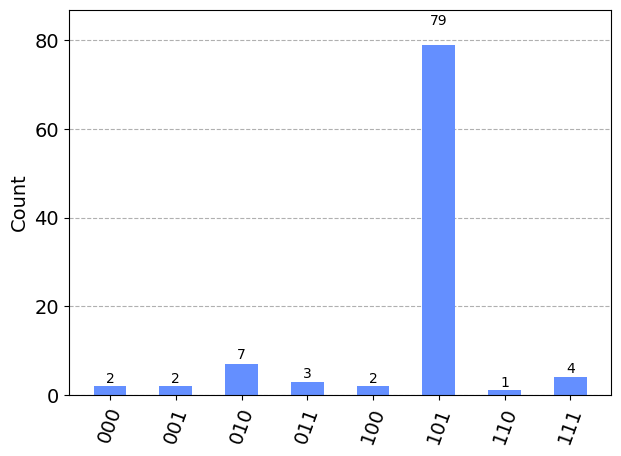

In [154]:
#Grover

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#alege un numar de cautat
search_number = 5


def parameter_search_oracle(x):
    #verificare binara a numerelor
    if ((x & 0b1) == 0): 
        circuit.x(qreg_q[0])
    if ((x & 0b10) == 0):
        circuit.x(qreg_q[1])
    if ((x & 0b100) == 0):
        circuit.x(qreg_q[2])
    circuit.h(qreg_q[2])
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
    circuit.h(qreg_q[2])
    circuit.barrier(qreg_q[0])
    circuit.barrier(qreg_q[1])
    #alegere a oracolului pe baza de masti
    if ((x & 0b1) == 0):
        circuit.x(qreg_q[0])
    if ((x & 0b10) == 0):
        circuit.x(qreg_q[1])
    if ((x & 0b100) == 0):
        circuit.x(qreg_q[2])
    
    return circuit

circuit.h(range(3))

#amplificator
circuit.compose(parameter_search_oracle(search_number))
circuit.h(range(3))
circuit.x(range(3))
circuit.h(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.barrier(range(2))
circuit.x(range(3))
circuit.h(range(3))

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

CircuitComposer(circuit=circuit)


simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=100)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)


In [ ]:
#Bomb Tester, nu a fost introdus si discutat teoretic in lucrare

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(pi / 3, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
### Secventa care se repeta
circuit.measure(qreg_q[1], creg_c[1]) #
circuit.reset(qreg_q[1]) #
circuit.rx(pi / 3, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
###
circuit.measure(qreg_q[1], creg_c[1])
circuit.rx(pi / 3, qreg_q[0])
circuit.reset(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.rx(pi / 3, qreg_q[0])
circuit.reset(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.rx(pi / 3, qreg_q[0])
circuit.reset(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.rx(pi / 3, qreg_q[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=50)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)